In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

In [82]:
t = pd.read_csv('./data/seoul_weather.csv', encoding='cp949', skiprows=11)
ts = pd.DataFrame(t)

In [83]:
ts.head(2)


,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),\t최고기온시각,최저기온(℃),최저기온시각
0,108,서울,1907-10-01,13.5,20.7,NaN,7.9,NaN
1,108,서울,1907-10-02,16.2,22.0,NaN,7.9,NaN


In [7]:
ts.dropna(inplace=True)

In [84]:
ts.drop(['\t최고기온시각','최저기온시각','\t\t지점번호'], axis=1, inplace=True)

In [85]:
ts.columns = '지점명','일시','평온','고온','저온'

In [86]:
ts.head(2)

,지점명,일시,평온,고온,저온
0,서울,1907-10-01,13.5,20.7,7.9
1,서울,1907-10-02,16.2,22.0,7.9


In [87]:
# 8월의 최고기온을 추출해서 라인그래프로 그리시오
ts['일시'] = pd.to_datetime(ts['일시'])
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40488 entries, 0 to 40487
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지점명     40488 non-null  object        
 1   일시      40488 non-null  datetime64[ns]
 2   평온      39732 non-null  float64       
 3   고온      39730 non-null  float64       
 4   저온      39731 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.5+ MB


In [88]:
ts['월'] = ts['일시'].dt.month
ts

,지점명,일시,평온,고온,저온,월
0,서울,1907-10-01,13.5,20.7,7.9,10
1,서울,1907-10-02,16.2,22.0,7.9,10
2,서울,1907-10-03,16.2,21.3,13.1,10
3,서울,1907-10-04,16.5,22.0,11.2,10
4,서울,1907-10-05,17.6,25.4,10.9,10
...,...,...,...,...,...,...
40483,서울,2019-10-07,14.8,17.9,13.3,10
40484,서울,2019-10-08,14.7,19.8,10.6,10
40485,서울,2019-10-09,13.6,20.4,7.7,10
40486,서울,2019-10-10,15.2,19.8,10.7,10


In [89]:
ts.loc[ts['월'] == 8]['고온']

305      29.6
306      30.7
307      32.0
308      31.5
309      32.4
         ... 
40442    29.3
40443    30.2
40444    26.4
40445    27.0
40446    28.9
Name: 고온, Length: 3410, dtype: float64

<AxesSubplot:>

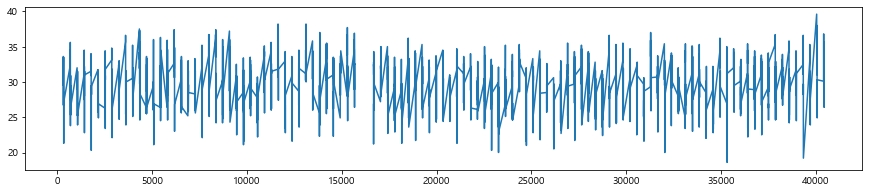

In [90]:
ts[ts['월'] == 8]['고온'].plot(figsize=(15,3))


<AxesSubplot:ylabel='Frequency'>

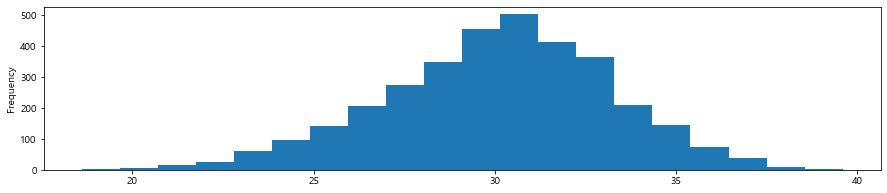

In [91]:
ts[ts['월'] == 8]['고온'].plot(kind='hist', bins=20, figsize=(15,3))

In [92]:
ts.head(2)

,지점명,일시,평온,고온,저온,월
0,서울,1907-10-01,13.5,20.7,7.9,10
1,서울,1907-10-02,16.2,22.0,7.9,10


In [93]:
# 매년 8월 중에 최고기온 하나를 뽑아서 라인 차트로 그리시오 
ts['연도']=ts['일시'].dt.year
ts.head(3)

,지점명,일시,평온,고온,저온,월,연도
0,서울,1907-10-01,13.5,20.7,7.9,10,1907
1,서울,1907-10-02,16.2,22.0,7.9,10,1907
2,서울,1907-10-03,16.2,21.3,13.1,10,1907


In [94]:
ts_8 = pd.DataFrame()
ts_8['월']=ts['월']
ts_8['연도']=ts['연도']
ts_8['고온']=ts['고온']
ts_8.head(2)

,월,연도,고온
0,10,1907,20.7
1,10,1907,22.0


<AxesSubplot:xlabel='연도'>

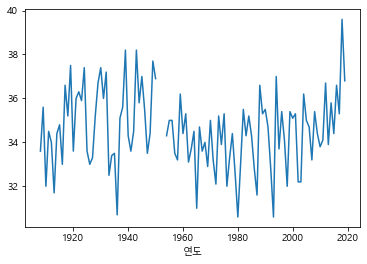

In [95]:
ts_8[ts_8['월']==8].groupby('연도')['고온'].max().plot()

<AxesSubplot:xlabel='연도'>

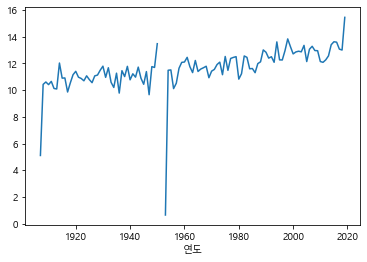

In [96]:
# 지구온난화 여부확인을 위해 매년 평균기온의 line차트를 그리시오 
ts.groupby('연도')['평온'].mean().plot()

In [98]:
ts.head(2)

,지점명,일시,평온,고온,저온,월,연도
0,서울,1907-10-01,13.5,20.7,7.9,10,1907
1,서울,1907-10-02,16.2,22.0,7.9,10,1907


In [109]:
# 1~12월 사이 각 월의 일평균기온의 bax chart를 그리시오
li=[]
s=0
for i in range(1,13):
    s = ts[ts['월']==i].groupby('연도')['평온'].mean()
    li.append(s)
    
li.plot(kind='bar')
    

AttributeError: 'list' object has no attribute 'plot'

In [112]:
# 01. CCTV_in_Seoul.csv
t = pd.read_csv('./data/CCTV_in_Seoul.csv')
tt= pd.DataFrame(t)
tt

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [113]:
tt.head(2)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377


In [115]:
# CCTV 수를 기준으로 구를 정렬하시오
tt.groupby('기관명')['소계'].max().sort_values(ascending=False)

기관명
강남구     2780
양천구     2034
서초구     1930
은평구     1873
용산구     1624
구로구     1561
관악구     1496
성북구     1464
동대문구    1294
노원구     1265
동작구     1091
성동구     1062
금천구     1015
종로구     1002
서대문구     962
영등포구     904
강서구      884
강동구      773
강북구      748
광진구      707
중구       671
중랑구      660
송파구      618
마포구      574
도봉구      485
Name: 소계, dtype: int64

In [124]:
# 2016년도에 cctv 수 증가율이 높은 상위 5개 구 출력
tt['증가율'] = tt['2016년']-tt['2015년']
tt.groupby('기관명')['증가율'].max().sort_values(ascending=False).head(5)

기관명
양천구     437
종로구     419
송파구     395
동대문구    381
강남구     348
Name: 증가율, dtype: int64

In [129]:
pop = pd.read_excel('./data/01. population_in_seoul.xls', header=2, usecols = [1,3,6,9,13])
pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [130]:
pop.columns = '자치구','인구수','한국인','외국인','고령자'
pop.head(2)

,자치구,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0


In [132]:
# 인구당 cctv 수가 가장 높은 구 상위 5개 출력
tt = pd.merge(tt,pop, left_on= '기관명', right_on='자치구')

In [133]:
tt.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,증가율,자치구,인구수,한국인,외국인,고령자
0,강남구,2780,1292,430,584,932,348,강남구,570500.0,565550.0,4950.0,63167.0
1,강동구,773,379,99,155,377,222,강동구,453233.0,449019.0,4214.0,54622.0
2,강북구,748,369,120,138,204,66,강북구,330192.0,326686.0,3506.0,54813.0
3,강서구,884,388,258,184,81,-103,강서구,603772.0,597248.0,6524.0,72548.0
4,관악구,1496,846,260,390,613,223,관악구,525515.0,507203.0,18312.0,68082.0


In [135]:
tt['인수'] = tt['소계']/tt['인구수']
tt.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년,증가율,자치구,인구수,한국인,외국인,고령자,인수
0,강남구,2780,1292,430,584,932,348,강남구,570500.0,565550.0,4950.0,63167.0,0.004873
1,강동구,773,379,99,155,377,222,강동구,453233.0,449019.0,4214.0,54622.0,0.001706
2,강북구,748,369,120,138,204,66,강북구,330192.0,326686.0,3506.0,54813.0,0.002265
3,강서구,884,388,258,184,81,-103,강서구,603772.0,597248.0,6524.0,72548.0,0.001464
4,관악구,1496,846,260,390,613,223,관악구,525515.0,507203.0,18312.0,68082.0,0.002847


In [147]:
tt.groupby('기관명')['인수'].max().sort_values(ascending=False).head(5)

기관명
용산구    0.006650
종로구    0.006154
중구     0.005036
강남구    0.004873
서초구    0.004286
Name: 인수, dtype: float64

In [ ]:
# 인구수, 외국인비율, 고령자 비율 중에서 인구당 cctv 수에 가장 큰 영향을 미치는 요소는 무엇인가


In [10]:
df = pd.read_csv('./data_study/subwaytime.csv', encoding='euckr')
df.head(3)

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,...,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,...,14478,4079,981,1256,3,29,0,0,0,0


In [155]:
df.dropna(inplace=True)

In [11]:
df.drop(['사용월','역ID','호선명'], axis=1, inplace=True)

In [159]:
df.head(2)

,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
1,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,...,33149,19442,3612,7167,0,410,0,0,0,0
2,시청,74,0,2409,4049,3532,19241,7703,66876,9978,...,14478,4079,981,1256,3,29,0,0,0,0


In [ ]:
# 출근시간에 승차인원이 가장 많은 역과 하차인원이 가장 많은 역을 출력하시오? ( 7시 ~ 9시)

In [165]:
ta = pd.DataFrame()
ta['지하철역'] = df['지하철역']
ta['7승'] = df['07:00:00~07:59:59']
ta['7하'] = df['Unnamed: 11']
ta['8승'] = df['08:00:00~08:59:59']
ta['8하'] = df['Unnamed: 13']

ta.head()

,지하철역,7승,7하,8승,8하
1,서울역,39110,103863,80492,236747
2,시청,7703,66876,9978,209349
3,종각,6733,104259,11028,300081
4,종로3가,6066,29381,9735,84155
5,종로5가,5143,40376,8509,132808


In [190]:
ta['7승'] = ta['7승'].apply(lambda x:int(x))
ta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 598
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지하철역    598 non-null    object
 1   7승      598 non-null    int64 
 2   7하      598 non-null    int64 
 3   8승      598 non-null    int64 
 4   8하      598 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 44.2+ KB


In [225]:

ta['아침승차']=ta['7승']+ta['8승']
ta['아침하차']=ta['7하']+ta['8하']

In [226]:
ta.head()

,지하철역,7승,7하,8승,8하,아침승차,아침하차
1,서울역,39110,103863,80492,236747,119602,340610
2,시청,7703,66876,9978,209349,17681,276225
3,종각,6733,104259,11028,300081,17761,404340
4,종로3가,6066,29381,9735,84155,15801,113536
5,종로5가,5143,40376,8509,132808,13652,173184


In [245]:
ta.groupby('지하철역')['아침승차'].max().sort_values(ascending=False).head(1)

지하철역
신림    598255
Name: 아침승차, dtype: int64

In [244]:
ta.groupby('지하철역')['아침하차'].max().sort_values(ascending=False).head(1)

지하철역
강남    563549
Name: 아침하차, dtype: int64

In [13]:
# 전체 시간에서 승차 인원이 가장 많은 역은?
df.head()

,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,...,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,승차,하차,승차,하차,승차,하차,승차,하차,승차,...,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,...,33149,19442,3612,7167,0,410,0,0,0,0
2,시청,74,0,2409,4049,3532,19241,7703,66876,9978,...,14478,4079,981,1256,3,29,0,0,0,0
3,종각,100,8,4409,5105,4593,26969,6733,104259,11028,...,54264,5560,4886,1722,0,0,0,0,0,0
4,종로3가,122,4,5061,2520,3876,12832,6066,29381,9735,...,25970,5503,3214,2471,0,52,0,0,0,0


In [22]:
li = []
a=7
type(a)
for i in range(df):
    a = i+'승'
    li.append(a)
    a = a+1
    
li

KeyError: (1, 28, 2)

In [ ]:
# 퇴근 시간에 하차인원이 가장 많은 역.. (pm 7:00 ~ 10:00)

In [ ]:
# 신림역의 퇴근시간 이용자 수?